# Visualization

In [58]:
#Declaring Imports
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from  scipy.stats import norm
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

### Read from sample superstore xl file into pandas dataframe and perform below operations

In [59]:
#Reading Dataframe Titanic Dataset
store = pd.read_excel(r"C:\Users\HSASS\OneDrive - Wipro\Desktop\Trainng-Perl_Python\Data Science Training\DS_2\sample_-_superstore_2.xls")
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#### a) Display Subcategory wise sum of profit

In [60]:
Subcategory = store.groupby(['Sub-Category'])['Profit'].sum()
print(Subcategory)

Sub-Category
Accessories    41936.6357
Appliances     18138.0054
Art             6527.7870
Binders        30221.7633
Bookcases      -3472.5560
Chairs         26590.1663
Copiers        55617.8249
Envelopes       6964.1767
Fasteners        949.5182
Furnishings    13059.1436
Labels          5546.2540
Machines        3384.7569
Paper          34053.5693
Phones         44515.7306
Storage        21278.8264
Supplies       -1189.0995
Tables        -17725.4811
Name: Profit, dtype: float64


#### b) Exclude Office Furniture Sub-Category

In [61]:
store1 = store.copy()
store1.drop(store1[store1['Category'] == 'Furniture'].index, inplace=True)
store1.reset_index(drop=True)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
1,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
2,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
3,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
4,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7868,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
7869,9989,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
7870,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
7871,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


#### c) Sort Sub-Category in Desc order

In [62]:
store1.sort_values(by=['Sub-Category'], ascending=False)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9728,9729,CA-2017-167395,2017-12-02,2017-12-04,First Class,KM-16720,Kunst Miller,Consumer,United States,Lowell,...,1852,East,OFF-SU-10001935,Office Supplies,Supplies,Staple remover,4.360,2,0.0,0.1744
6032,6033,CA-2017-104010,2017-04-23,2017-04-25,First Class,TD-20995,Tamara Dahlen,Consumer,United States,New York City,...,10011,East,OFF-SU-10001218,Office Supplies,Supplies,Fiskars Softgrip Scissors,54.900,5,0.0,15.3720
7086,7087,CA-2017-112004,2017-09-25,2017-09-28,First Class,AH-10075,Adam Hart,Corporate,United States,Chester,...,19013,East,OFF-SU-10000157,Office Supplies,Supplies,Compact Automatic Electric Letter Opener,190.896,2,0.2,-42.9516
9316,9317,CA-2016-161907,2016-04-05,2016-04-09,Standard Class,JH-16180,Justin Hirsh,Consumer,United States,Philadelphia,...,19140,East,OFF-SU-10000646,Office Supplies,Supplies,Premier Automatic Letter Opener,769.184,4,0.2,-163.4516
7075,7076,CA-2016-112256,2016-07-23,2016-07-28,Standard Class,CK-12205,Chloris Kastensmidt,Consumer,United States,Mcallen,...,78501,Central,OFF-SU-10001165,Office Supplies,Supplies,Acme Elite Stainless Steel Scissors,13.344,2,0.2,1.0008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9308,9309,CA-2014-128237,2014-03-25,2014-03-30,Standard Class,CA-12265,Christina Anderson,Consumer,United States,San Francisco,...,94110,West,TEC-AC-10002558,Technology,Accessories,Imation Swivel Flash Drive USB flash drive - 8 GB,45.480,4,0.0,15.9180
8029,8030,CA-2016-166373,2016-10-21,2016-10-25,Standard Class,JF-15565,Jill Fjeld,Consumer,United States,San Antonio,...,78207,Central,TEC-AC-10002323,Technology,Accessories,SanDisk Ultra 32 GB MicroSDHC Class 10 Memory ...,106.080,6,0.2,-9.2820
4975,4976,CA-2015-142202,2015-09-18,2015-09-23,Second Class,JR-16210,Justin Ritter,Corporate,United States,Jacksonville,...,32216,South,TEC-AC-10003198,Technology,Accessories,Enermax Acrylux Wireless Keyboard,717.120,9,0.2,152.3880
8027,8028,CA-2015-132465,2015-09-11,2015-09-15,Second Class,DM-13525,Don Miller,Corporate,United States,New York City,...,10035,East,TEC-AC-10001998,Technology,Accessories,Logitech LS21 Speaker System - PC Multimedia -...,19.990,1,0.0,6.7966


#### d) Category-wise sum of profit in pie chart

In [63]:
cat = store1.groupby(['Category'])['Profit'].sum()

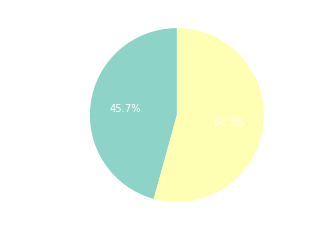

In [64]:
units = list(store1.Category.unique())
plt.pie(cat, labels=units, startangle = 90, autopct='%.1f%%')
plt.show()

#### e) Line Chart year wise sum of profit

In [65]:
store2 = pd.DatetimeIndex(store1['Order Date']).to_period("Y")
store1['Year of Order'] = store2
store1['Year of Order'] = store1['Year of Order'].astype('str')
pr=store1.groupby(['Year of Order'])['Profit'].sum()

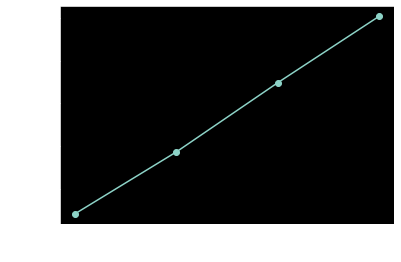

In [66]:
years = list(store1['Year of Order'].unique())
years.sort()
plt.plot(years,list(pr), marker='o')
plt.xlabel('Years')
plt.ylabel('Profits')
plt.show()

#### f) Display Top 10 most profitable customers

In [67]:
profitablecustomer = store1.groupby('Customer Name')['Profit'].sum().sort_values(ascending = False)[:10]
print(profitablecustomer)

Customer Name
Tamara Chand            8981.3239
Raymond Buch            6951.3849
Sanjit Chand            5661.1706
Adrian Barton           5520.0105
Hunter Lopez            5375.7969
Tom Ashbrook            4766.6539
Christopher Martinez    3903.9304
Daniel Raglin           3239.2750
Sanjit Engle            2952.0845
Andy Reiter             2791.8552
Name: Profit, dtype: float64


#### g) Scatter plot between profit and sales

Text(0.5, 0, 'Profit')

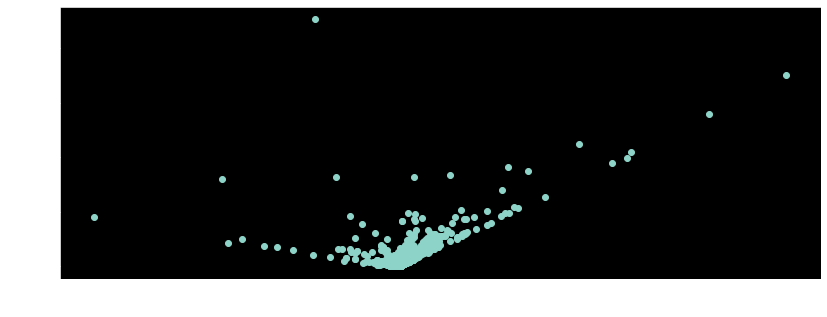

In [68]:
x = store1['Profit']
y = store1['Sales']
plt.figure(figsize=(30,5))
ax = plt.subplot(1, 2, 1)
ax.scatter(x,y)
ax.set_ylabel('Sales')
ax.set_xlabel('Profit')
#ax2 = plt.subplot(1, 2, 2)
#ax2.scatter(x,y, c=labels.labels_);

### 6. Create dept dataframe and emp dataframe  with suitable data and perform inner , leftouter,RightOuter and FullOuter Joins based on common column Deptno

In [69]:
dept_data = {'Deptno':[1,2,3,4,5], \
             'Dname':['Suman','Shiva','Rahul','Smita','Anindita'], \
             'Loc':['Mumbai','Chennai','Kolkata','New Delhi','Gurgaon']}
Dept = pd.DataFrame(dept_data)
Dept

,Deptno,Dname,Loc
0,1,Suman,Mumbai
1,2,Shiva,Chennai
2,3,Rahul,Kolkata
3,4,Smita,New Delhi
4,5,Anindita,Gurgaon


In [70]:
emp_data = {'Deptno':[1,3,4,6],'Eno':[101,102,103,104],'Sal':[10000,30000,50000,70000]}
Emp = pd.DataFrame(emp_data)
Emp

,Deptno,Eno,Sal
0,1,101,10000
1,3,102,30000
2,4,103,50000
3,6,104,70000


In [71]:
 # inner join
    
innerjoin = pd.merge(Emp,Dept,on='Deptno',how='inner')
innerjoin

,Deptno,Eno,Sal,Dname,Loc
0,1,101,10000,Suman,Mumbai
1,3,102,30000,Rahul,Kolkata
2,4,103,50000,Smita,New Delhi


In [72]:
#left outer join

leftouterjoin = pd.merge(Emp,Dept,on='Deptno',how='left')
leftouterjoin

,Deptno,Eno,Sal,Dname,Loc
0,1,101,10000,Suman,Mumbai
1,3,102,30000,Rahul,Kolkata
2,4,103,50000,Smita,New Delhi
3,6,104,70000,NaN,NaN


In [73]:
#full outer join

fullouterjoin = pd.merge(Emp,Dept,on='Deptno',how='outer')
fullouterjoin

,Deptno,Eno,Sal,Dname,Loc
0,1,101.0,10000.0,Suman,Mumbai
1,3,102.0,30000.0,Rahul,Kolkata
2,4,103.0,50000.0,Smita,New Delhi
3,6,104.0,70000.0,NaN,NaN
4,2,NaN,NaN,Shiva,Chennai
5,5,NaN,NaN,Anindita,Gurgaon


In [74]:
fullouterjoin.sort_values(by='Deptno')
fullouterjoin.reset_index(drop=True)

,Deptno,Eno,Sal,Dname,Loc
0,1,101.0,10000.0,Suman,Mumbai
1,3,102.0,30000.0,Rahul,Kolkata
2,4,103.0,50000.0,Smita,New Delhi
3,6,104.0,70000.0,NaN,NaN
4,2,NaN,NaN,Shiva,Chennai
5,5,NaN,NaN,Anindita,Gurgaon


## Descriptive and Inferential Statistics:

### 7. Suppose the height of men in the United Kingdom is known to be normally distributed with a mean of 177 centimeters and a standard deviation of 10 centimeters. If you were to select a man from the United Kingdom population at random, what is the probability that he would be more than 200 centimeters tall?

In [75]:
prob = 1 - norm(177,10).cdf(200) 
print("The probability that he will be more than 200 centimeters tall is {0:.5f}" .format(prob))

The probability that he will be more than 200 centimeters tall is 0.01072


## 8. Let's take the mileage and horsepower of various cars and see if there is a relation between the two.

In [76]:
mpg = [21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8, 16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4,
       33.9, 21.5, 15.5, 15.2, 13.3, 19.2, 27.3, 26.0, 30.4, 15.8, 19.7, 15.0, 21.4]
hp = [110, 110, 93, 110, 175, 105, 245, 62, 95, 123, 123, 180, 180, 180, 205, 215, 230, 66, 52, 65, 97, 150, 150, 245, 175, 66, 91, 113, 264, 175, 335, 109]

print(np.corrcoef(mpg,hp))

[[ 1.         -0.77616837]
 [-0.77616837  1.        ]]


### 9.  Perform T-test on two classes that are given a mathematics test and have 10 students in each class. Determine if 2 distributions are identical or not.

In [77]:
class1_score = np.array([45.0, 40.0, 49.0, 52.0, 54.0, 64.0, 36.0, 41.0, 42.0, 34.0])
class2_score = np.array([75.0, 85.0, 53.0, 70.0, 72.0, 93.0, 61.0, 65.0, 65.0, 72.0])  

ttest,pval = ttest_ind(class1_score , class2_score,equal_var=False)
print(ttest)
print(pval)

-5.458195056848408
4.143974376256027e-05


### 10. The mean score of the mathematics exam at a national level is 60 marks and the standard deviation is 3 marks. The mean marks of a class are 53. The null hypothesis is that the mean marks of the class are similar to the national average.  Test this Hypothesis using Z – Test.

In [78]:
class_mean = 53
national_mean = 60
std_val= 3

Z_score = (class_mean - national_mean)/std_val

print("Z-Score of the data:", Z_score)

Z-Score of the data: -2.3333333333333335


In [79]:
p_value = round(1 - norm.cdf(Z_score), 3)
p_value

0.99

In [80]:
if p_value <0.05:
    print("null hypothesis is rejected")
else:
    print("null hypothesis is true")

null hypothesis is true


### 11. Calculate Pearson correlation coefficient between Girth and Volume in trees dataset( trees csv file) Pl mention what you draw from correlation coefficient

In [81]:
tree_data = pd.read_csv('trees.csv')
tree_data.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


In [82]:
pearson_corr = pearsonr(tree_data['Girth'],tree_data['Volume'])
print(pearson_corr[0])

0.9671193682556306


 #### As value is nearly 1, we can say that there is a strong positive correlation between Girth & Volume

## Machine Learning Algorithms

### 12. Use Automobile price data Raw csv file : 
Split data 80% to train 20% for test

predict price for 20% test data

Determine R-Squared value

In [83]:
data = pd.read_csv('auto_price_data.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [84]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [86]:
numeri_col = ["normalized-losses","wheel-base","engine-size","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
for col in numeri_col: 
    data[col] = pd.to_numeric(data[col].replace('?',0)) 
    data[col] = data[col].replace(0, np.mean(data[col])) 

In [87]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,97.6,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,97.6,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,97.6,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [88]:
data['num-of-doors'].value_counts(dropna=False)
data['num-of-doors']=data['num-of-doors'].fillna(data['num-of-doors'].mode())
data["make"]=data["make"].factorize()[0]
data["fuel-type"]=data["fuel-type"].factorize()[0]
data["aspiration"]=data["aspiration"].factorize()[0]
data["num-of-doors"]=data["num-of-doors"].factorize()[0]
data["body-style"]=data["body-style"].factorize()[0]
data["drive-wheels"]=data["drive-wheels"].factorize()[0]
data["engine-location"]=data["engine-location"].factorize()[0]
data["engine-type"]=data["engine-type"].factorize()[0]
data["num-of-cylinders"]=data["num-of-cylinders"].factorize()[0]
data["fuel-system"]=data["fuel-system"].factorize()[0]

In [89]:
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,97.6,0,0,0,0,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,97.6,0,0,0,0,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,97.6,0,0,0,0,1,0,0,94.5,...,152,0,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,0,0,1,2,1,0,99.8,...,109,0,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,0,0,1,2,2,0,99.4,...,136,0,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    int64  
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    int64  
 7   drive-wheels       205 non-null    int64  
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    int64  
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [91]:
x = data.drop('price', axis=1)
y= data['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [92]:
model = LinearRegression()  
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)
print(f'  Y = {model.coef_[0]:.4f} * X + {model.intercept_:.4f}')

-35441.19212729406
[-3.01783956e+01 -1.15713398e+01 -1.57944765e+02  6.66817584e+03
  3.87416795e+03 -3.35668525e+02 -3.30776969e+02 -2.18172429e+03
  1.56819911e+04 -1.21052683e+02  1.02715281e+02  4.18007457e+02
  2.28791069e+02  8.82098511e-01 -1.71281202e+02  9.15394609e+02
  1.36564528e+02 -4.06910323e+02 -9.52029280e+02 -3.26424541e+03
 -4.19991613e+02 -6.27340159e+01  2.46233661e+00  9.23198015e+00
 -1.64252868e+01]
  Y = -30.1784 * X + -35441.1921


In [93]:
pred= model.predict(X_test)
print(pred)

[10433.10981274 12020.30169399 36256.65890127 20675.12414863
  7953.97390306  9340.87535102 10148.83965817  6393.17514258
  7643.15867147  8046.48745284 28521.89714099 14678.50604077
  7969.54186049 10034.34934439 14558.03463271 11979.90974039
  6382.42380824  8140.32669978 13072.20386306  5795.55170972
 14689.23771031  7037.0474322   8927.38675724 11979.90974039
 11647.31907537  8037.20571284 16336.37378111  8177.94600215
  7207.92782085 11243.08213996 29070.37864871  6944.51275184
 19058.65815042 26227.56193679 14295.86070273 16111.18503428
 12170.84414724 12311.77250081  8788.52705234 16732.32044766
 10559.67147945]


In [94]:
r2_score(y_test, pred) #Pima Indians Diabetes Binary Classification dataset.csv

0.8768027345661503

### 13. The Pima Indians Diabetes Binary Classification

In [95]:
diabetes_data = pd.read_csv('Pima Indians Diabetes Binary Classification dataset.csv')
diabetes_data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [96]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

In [97]:
diabetes_data.isnull().sum()

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skin fold thickness (mm)                                            0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age (years)                                                                 0
Class variable (0 or 1)                                                     0
dtype: int64

In [98]:
X = diabetes_data.iloc[:,:8].values
y = diabetes_data.iloc[:,8].values

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.20)

In [99]:
sc = StandardScaler()
features = diabetes_data.columns.to_list()
features.remove('Class variable (0 or 1)')
diabetes_data[features] = sc.fit_transform(diabetes_data[features])

C:\Ananconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Ananconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [100]:
Logmodel = LogisticRegression().fit(X_train, y_train)

C:\Ananconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [101]:
Logpred = Logmodel.predict(X_test)
Logpred

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [102]:
accuracy_score(y_test, Logpred)

0.7207792207792207

In [103]:
confusion_matrix(y_test, Logpred)

array([[82, 16],
       [27, 29]], dtype=int64)

In [104]:
print(classification_report(y_test,Logpred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        98
           1       0.64      0.52      0.57        56

   micro avg       0.72      0.72      0.72       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.71      0.72      0.71       154



### 14. Use hotel.csv file and Show how to cluster hotel location data with K-means Clustering. That is perform K-means clustering on hotel location data to identify whether the hotels are located in the same district.

### Using k-means cluster location data for 3 clusters.

In [105]:
hotel_data = pd.read_csv('hotels.csv')
hotel_data.head()

,address,lat,lon,title,district
0,"No.30 Youya Road, Beitou District, Taipei 1124...",25.137793,121.51495,Grand View Resort Beitou,Beitou
1,"No.28 Section 1, Minsheng East Road, Zhongshan...",25.057854,121.52409,YoMi Hotel,Zhongshan
2,"No.3 Zhongshan Road, Beitou District, Taipei 1...",25.137163,121.50544,Beitou Hot Spring Resort (Tian Yue Quan),Beitou
3,"No.18 Songgao Road, Xinyi District, Taipei 110...",25.039248,121.56741,Humble House Taipei,Xinyi
4,"4F., No.11, Sec. 2, Nanjing E. Road, Taipei 10...",25.052057,121.52831,Taipei Morning Hotel,Zhongshan


In [106]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   address   102 non-null    object 
 1   lat       102 non-null    float64
 2   lon       102 non-null    float64
 3   title     102 non-null    object 
 4   district  102 non-null    object 
dtypes: float64(2), object(3)
memory usage: 4.1+ KB


In [107]:
hotel_data.isnull().sum()

address     0
lat         0
lon         0
title       0
district    0
dtype: int64

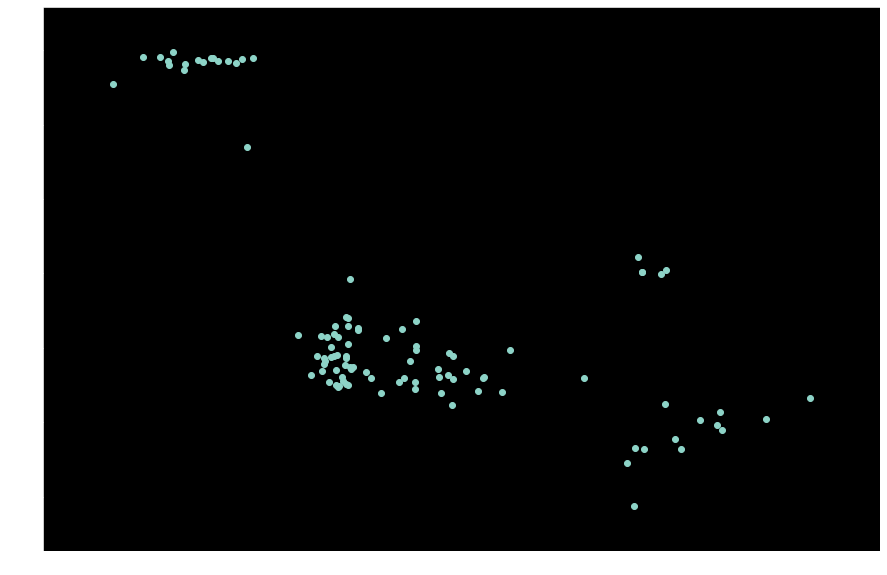

In [108]:
plt.figure(figsize=(15,10))
plt.scatter(hotel_data['lon'], hotel_data['lat'])
plt.show()

In [109]:
x= hotel_data.iloc[:,1:3]

In [110]:
#scaler = StandardScaler()
#unscaled = scaler.fit_transform(x)
unscaled = np.array(x)

In [111]:
nc = 3
kmeans = KMeans(n_clusters=nc, init='k-means++', 
                        max_iter=20, n_init=10, random_state=0)
kmeans.fit(unscaled)
kmeans.cluster_centers_

array([[ 25.05657006, 121.52900055],
       [ 25.04905484, 121.56266768],
       [ 25.13558789, 121.50866228]])

In [112]:
clpred=  kmeans.predict(unscaled)

In [113]:
clustered_data = pd.DataFrame(unscaled,columns=['Latitude','Longitude'])
clustered_data['cluster'] = clpred
clustered_data.head()

,Latitude,Longitude,cluster
0,25.137793,121.51495,2
1,25.057854,121.52409,0
2,25.137163,121.50544,2
3,25.039248,121.56741,1
4,25.052057,121.52831,0


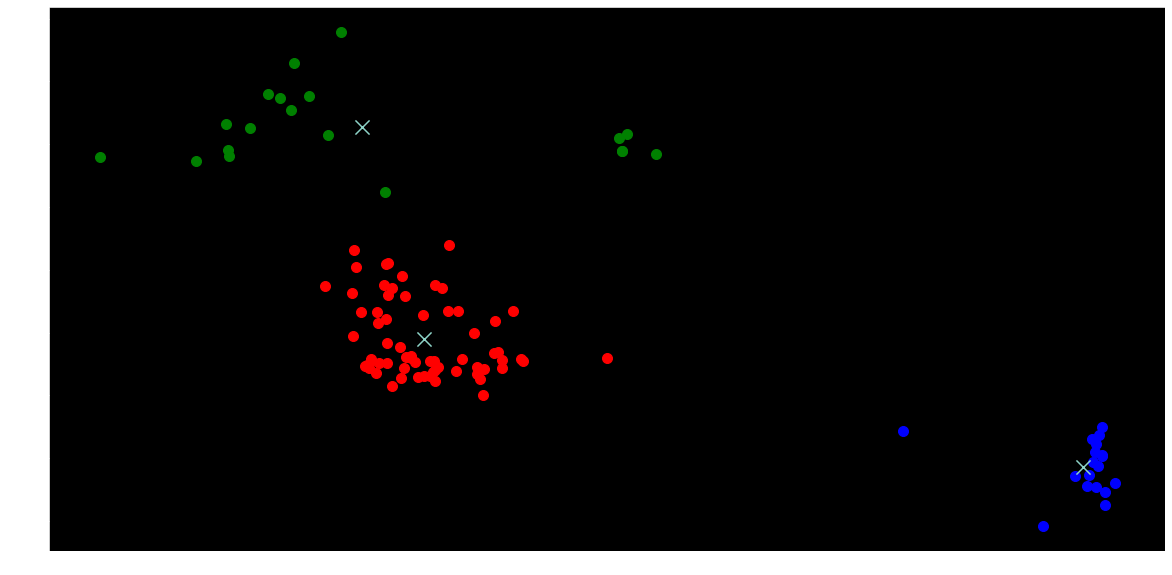

In [114]:
plt.figure(figsize=(20,10))
colors = ['r.', 'g.', 'b.', 'bl.']
labels = kmeans.labels_
for i in range(len(unscaled)):
    plt.plot(unscaled[i][0], unscaled[i][1], colors[labels[i]], markersize=20)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=5, zorder=10)
plt.show()